# Random Forest Regression
[Reference](https://medium.com/data-science-bridge/random-forest-regression-ddfc88c92689)

In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np

In [2]:
housing_data = fetch_california_housing()

In [3]:
df = pd.DataFrame(np.c_[housing_data.data, housing_data.target], columns=housing_data.feature_names + ["target"])

In [4]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [6]:
corr = df.corr()
corr

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
target,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


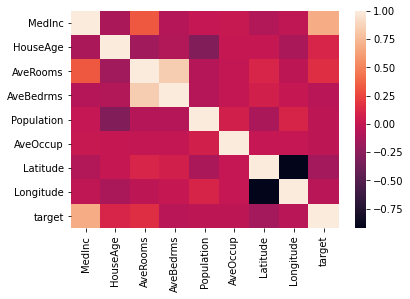

In [7]:
import seaborn as sns
sns.heatmap(corr)

In [8]:
X = df.drop('target',axis=1)
y = df['target']

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [10]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
reg = RandomForestRegressor(n_estimators=1000, criterion='mse', random_state=123, n_jobs=-1)
reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=-1, oob_score=False,
                      random_state=123, verbose=0, warm_start=False)

In [11]:
from sklearn.metrics import mean_squared_error as mse
y_pred = reg.predict(X_test)
print("Mean Squared error on training data --> {}\nMean Squared error on test data --> {}".format(mse(y_train, reg.predict(X_train)), mse(y_test, y_pred)))

Mean Squared error on training data --> 0.03399803754840988
Mean Squared error on test data --> 0.24600298151770789


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


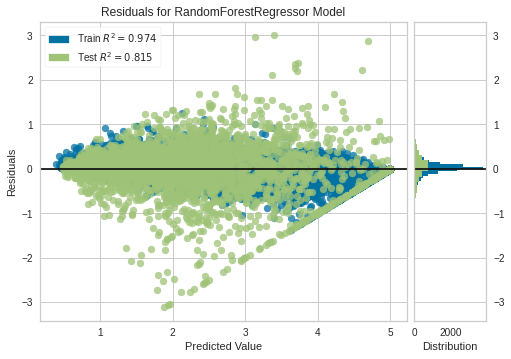

In [12]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(reg)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)  
visualizer.poof()

In [13]:
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(
estimator=RandomForestRegressor(),
param_grid={
'max_depth': range(3,7),
'n_estimators': (10, 50, 100, 1000),
},
cv=5, scoring='neg_mean_squared_error', verbose=0,n_jobs=-1)
grid_result = gs.fit(X_train, y_train)
best_params = grid_result.best_params_
random_forest = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"],random_state=False, verbose=False)
random_forest.fit(X_train, y_train)
from sklearn.metrics import mean_squared_error as mse
y_pred_test = random_forest.predict(X_test)
y_pred_train = random_forest.predict(X_train)
print("Mean Squared error on training data --> {}\nMean Squared error on test data --> {}".format(mse(y_train, y_pred_train), mse(y_test, y_pred_test)))

Mean Squared error on training data --> 0.36852026373666535
Mean Squared error on test data --> 0.4027801179675606
